In [178]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams['figure.figsize'] = [15, 5]
from nbconvert import HTMLExporter
import codecs
import nbformat

In [172]:
df = pd.read_csv('text_analytics_withoutLDA.csv')

In [176]:
times_list = {}
ideas = np.sort(list(Counter(df['idea_id']).keys()))
for i in ideas:
    times = list(df.loc[df['idea_id'] == i, 'created_at'])    
    times_list[i] = times

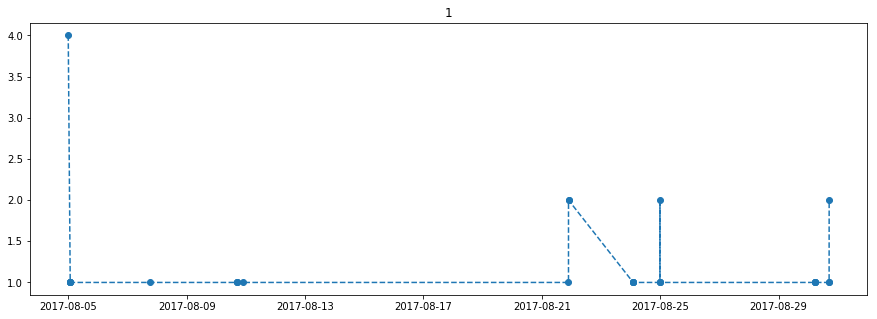

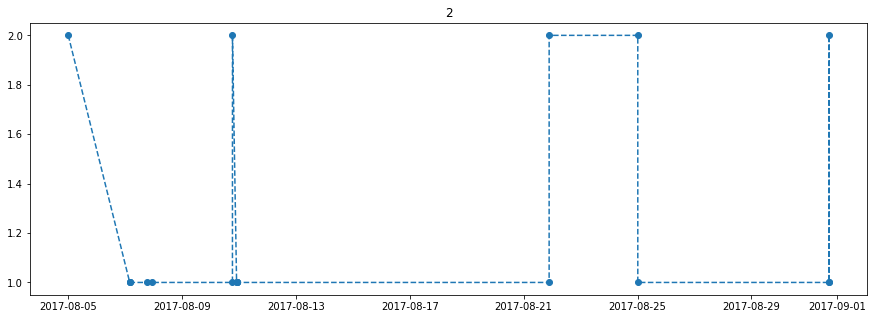

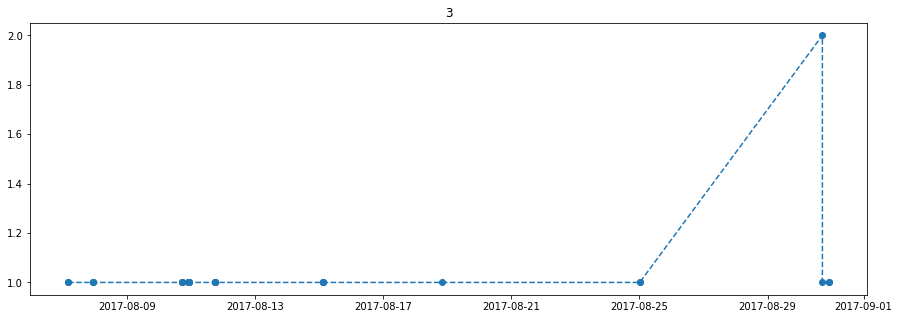

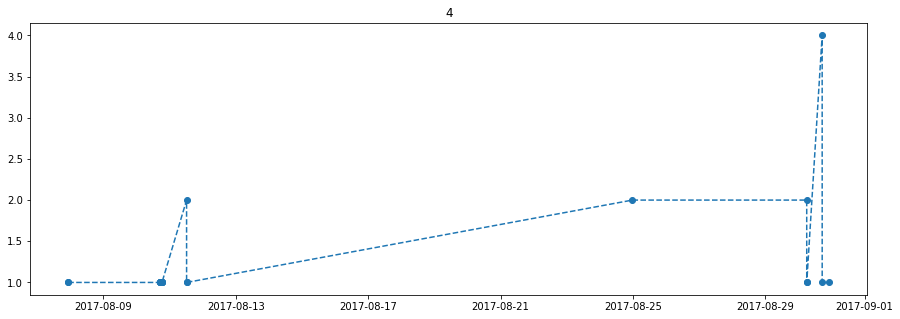

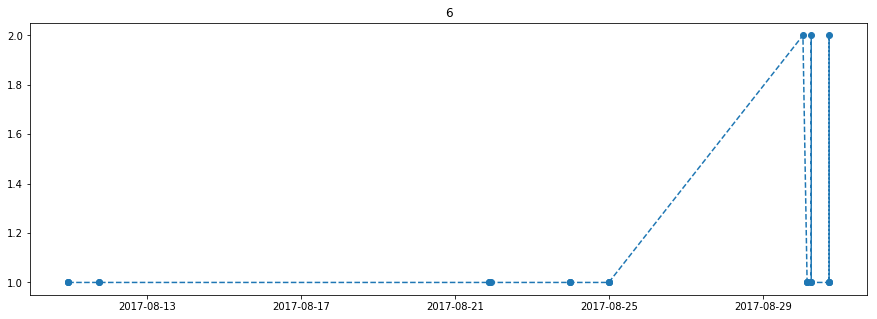

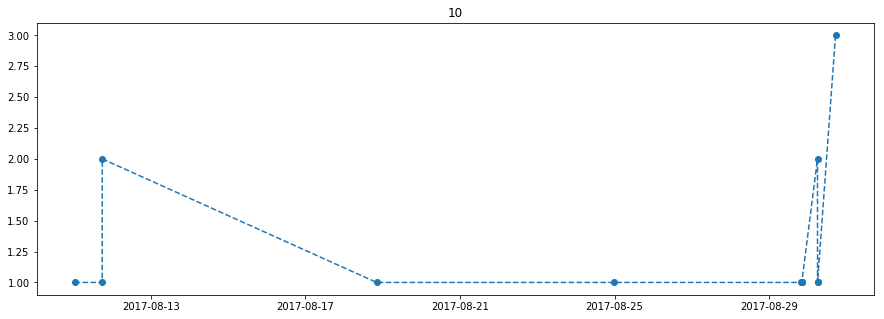

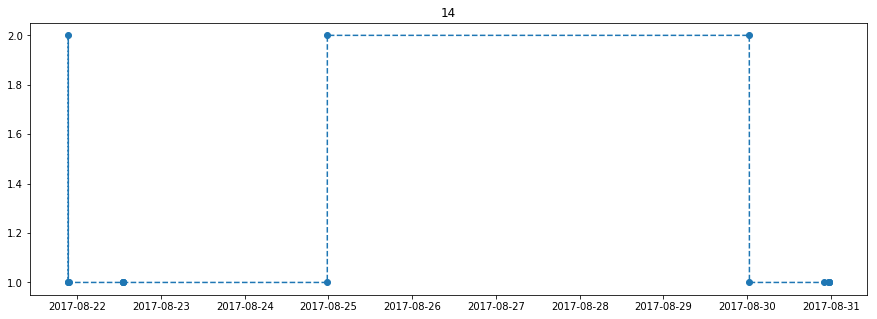

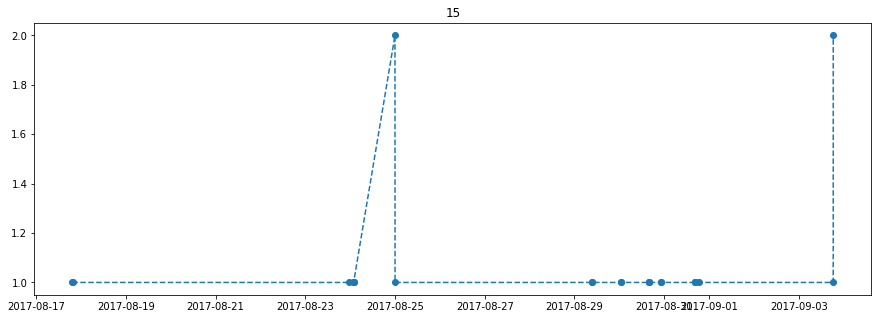

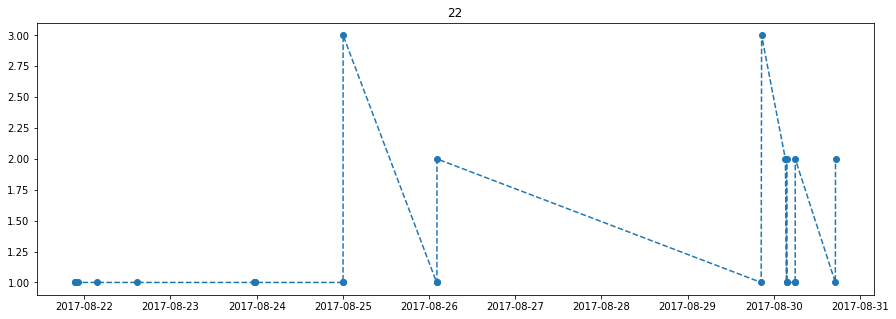

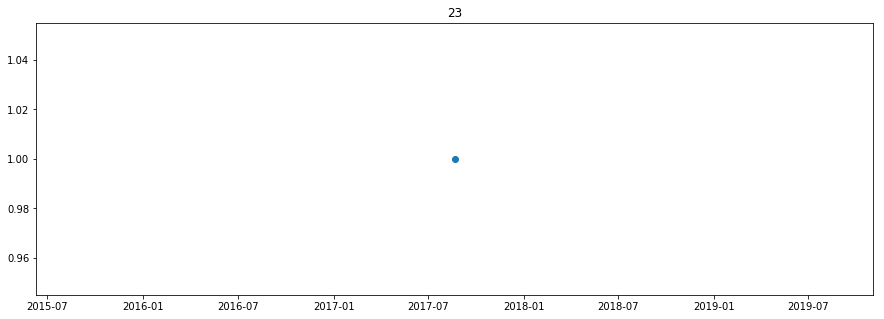

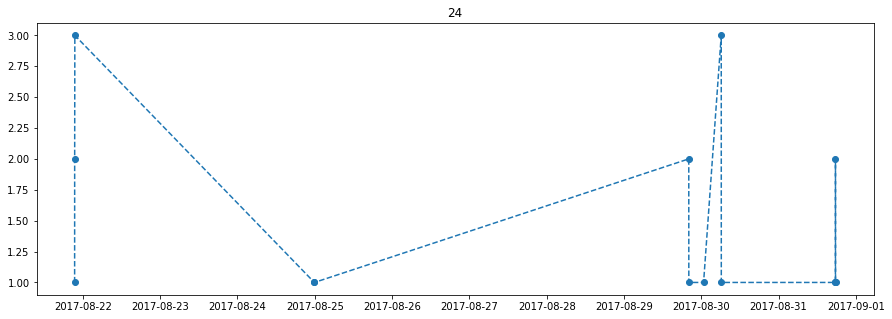

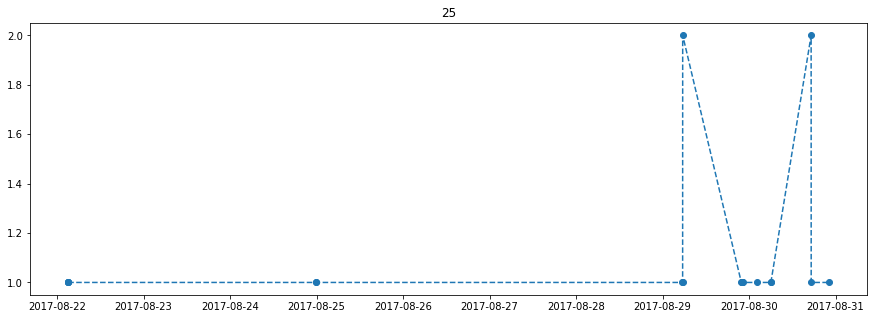

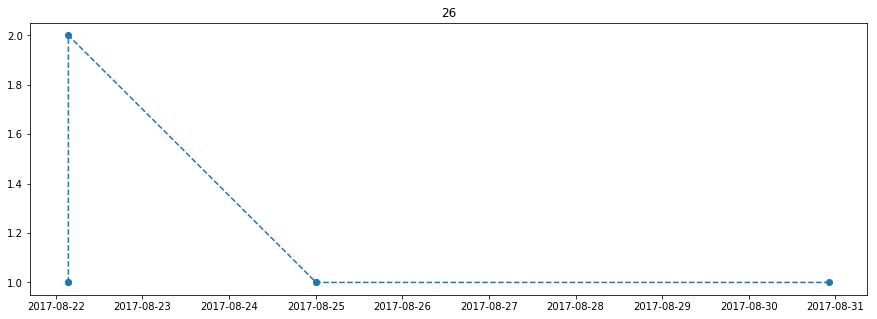

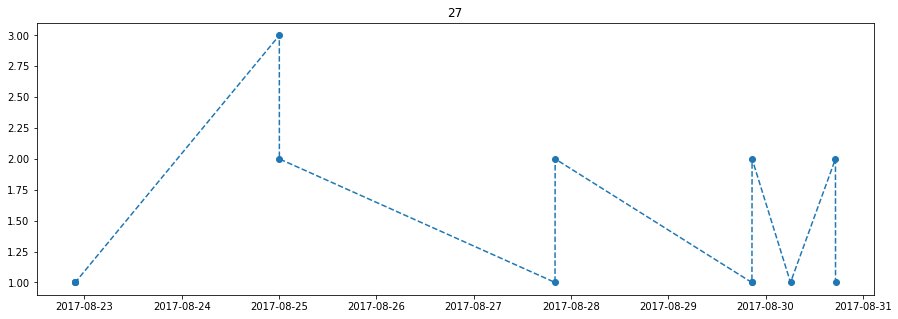

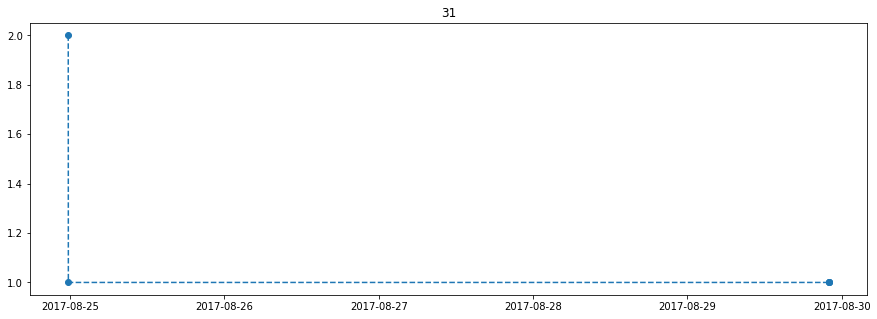

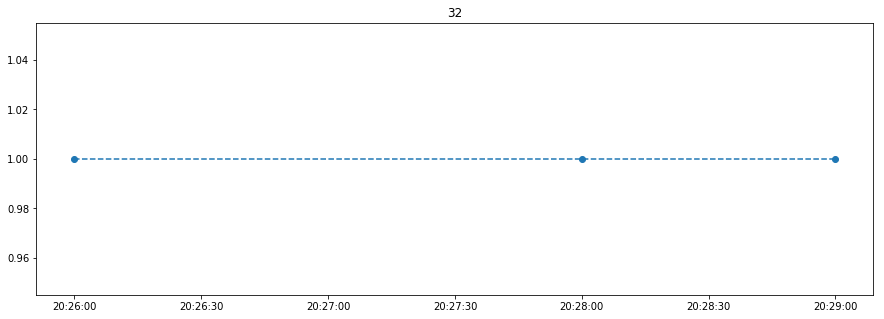

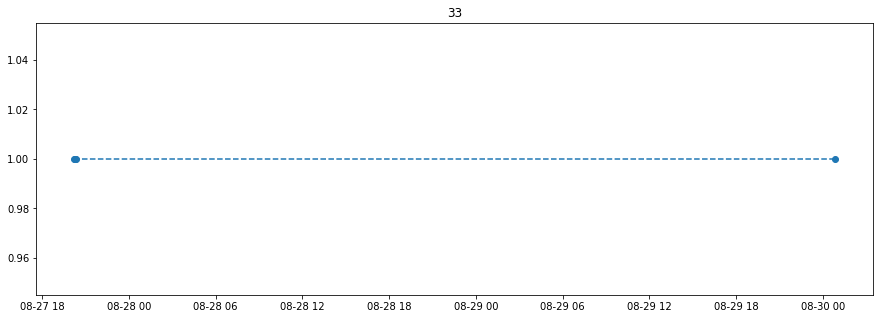

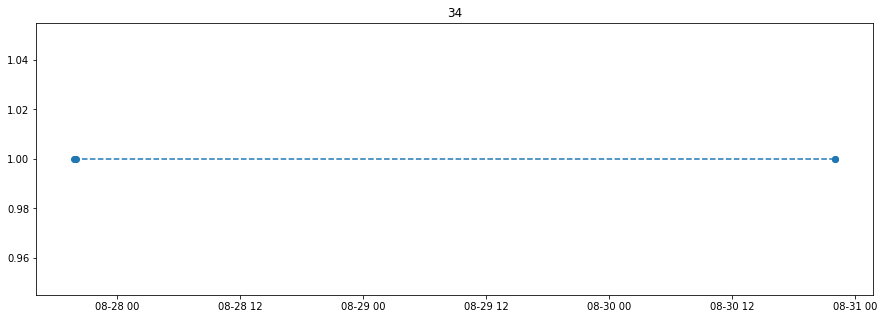

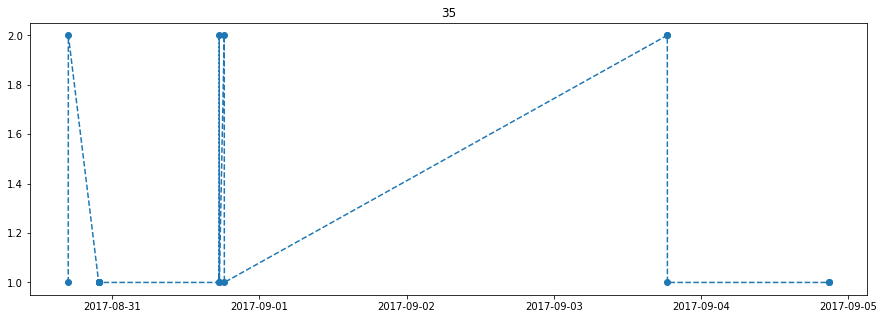

In [177]:
for t in times_list:
    time_freq = Counter(times_list[t])
    time_objs = []
    time_vals = []

    k = 0
    for key,val in time_freq.items():
        date_object = datetime.strptime(key, "%m/%d/%Y %H:%M")
        time_objs = np.append(time_objs, date_object)
        time_vals = np.append(time_vals, val)
        dates = matplotlib.dates.date2num(time_objs)
    
    plt.figure(k)
    plt.title(t)
    plt.plot_date(dates, time_vals, ls='--')
    k += 1
    plt.show()

In [181]:
notebook_name = 'pulse.ipynb'
output_file_name = 'output.html'

exporter = HTMLExporter()
output_notebook = nbformat.read(notebook_name, as_version=4)

output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(output_file_name, 'w', encoding='utf-8').write(output)